# CS4168 Data Mining

## Lab 1: Exploratory Data Analysis (EDA)

**David Walsh 20276885**

*To Do:*
* Formulate a particular question that might be interesting to answer by exploring this dataset.
* Calculate statistics for the numerical and categorical attributes.
* Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (in a markdown cell).
* Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
* Make sure your conclusions are related to the question you have formulated.

**Question: Does an individual's balance and education affect their martial status?**

# Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [ ]:
# Loading the dataset
df = pd.read_csv("./bank.csv")

# Quick Data Exploration

In [ ]:
# Print first 6 rows of the dataframe (the head)
df.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no


In [ ]:
# Print first 6 rows of the dataframe (the tail)
df.tail(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [ ]:
# The dimensions of the bank.csv dataframe
df.shape

(2000, 17)

* There are 2000 rows and 17 columns of both categorical and numerical data.

In [ ]:
# Find what headings have missing values and how many
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Here we find what data has missing values:
* age has 12 missing values.
* job has 10 missing values.
* education has 104 missing values.
* contact has 191 missing values.
* poutcome has 454 missing values.

# Quick Examination of Numerical Attributes

In [ ]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


<ipython-input-738-58f83ba68e16>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True);


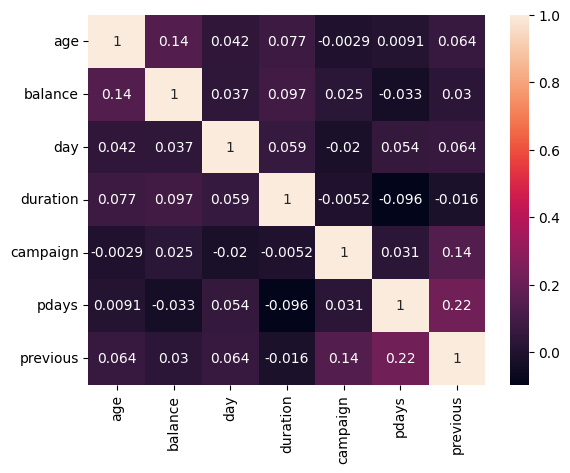

In [ ]:
# Correlation matrix (heatmap)
sns.heatmap(df.corr(), annot = True);

**Overview:**
* Low Correlation: Most variables exhibit low correlation with one another, as indicated by the correlation coefficients being close to zero. This suggests that there is no strong linear relationship between these variables.

**Highest Correlations:**
* previous and pdays have a correlation coefficient of 0.22, indicating a weak, positive linear relationship.
* campaign and previous have a correlation coefficient of 0.14, suggesting a very weak positive association.
* age and balance have a correlation coefficient of 0.14, suggesting a very weak positive association.
* balance and duration have a correlation coefficient of 0.14, suggesting a very weak positive association.

**Negative Correlations:** There are a few negative correlations observed, though they are very weak:
* pdays and duration have a coefficient of -0.096.

The heatmap shows that there is very little linear association between the variables presented. The data does not suggest strong predictive relationships, and the influence of these variables on each other is minimal at best. This could indicate that more complex, non-linear relationships exist, or that other unmeasured factors play a larger role in influencing these variables.


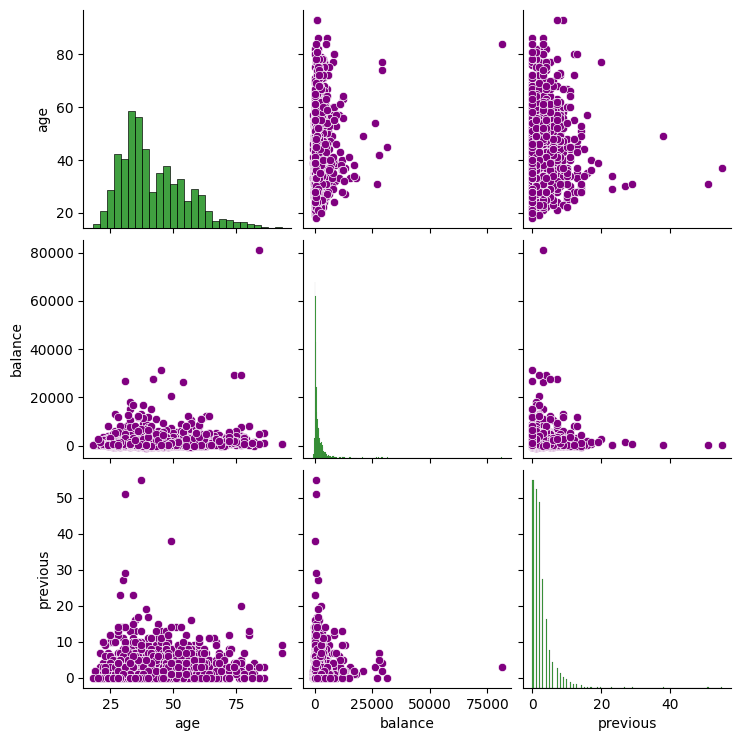

In [ ]:
# Pairplot for age, balance, and previous

plot_kws = {"color": "purple"}  # Change scatter plot marker colors to purple
diag_kws = {"color": "green"}  # Change histogram/density plot colors to green

# Create the pairplot
sns.pairplot(data=df[['age', 'balance', 'previous']].dropna(), plot_kws = plot_kws, diag_kws = diag_kws) # Drop rows with missing values

plt.show()

**Age Distribution:** The histogram for 'age' shows a right-skewed distribution, indicating a younger population with fewer older individuals. Most individuals are concentrated in the 25-50 age range.

**Balance Distribution:** 'Balance' also exhibits a right-skewed distribution, with most individuals having lower balances (0 - 20,000), while a few have significantly higher balances, potentially indicating wealth accumulation with age or higher earning individuals.

**Previous Distribution:** The 'previous' variable is highly skewed with most individuals having a value close to zero (0 - 10).

**Relationships between Variables:**
* Age and Balance: The scatter plots do not show a clear relationship between 'age' and 'balance', suggesting that the balance amount is not strongly dependent on age within this dataset.
* Age and Previous: There appears to be no strong relationship between 'age' and 'previous', with a wide spread of 'previous' across all ages.
* Balance and Previous: Similarly, 'balance' and 'previous' do not display a clear relationship, with individuals having a range of balances regardless of their previous.

**Outliers:** Notable outliers are present, particularly in the 'balance' and 'previous' variables, with some individuals having exceptionally high values compared to the rest of the population.

Overall, the pair plot suggests a younger to midde-age population with generally lower balances and few previous. The lack of clear trends between these variables may indicate that factors not included in the plot have a more significant impact on balance and engagement levels.

# Quick Examination of Categorical Attributes

In [ ]:
# Education
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [ ]:
df['education'].count()

1896

**Overview:** The dataset contains 1896 individuals:
* 52.5% with secondary education (995 individuals).
* 36.1% with tertiary education (684 individuals).
* 11.4% with primary education (217 individuals).

In [ ]:
# Marital Status
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [ ]:
df['marital'].count()

2000

**Overview:** The dataset outlines the marital status of 2,000 individuals:
* The majority, 55.55%, are married (1,111 individuals).
* 33.7% who are single (674 individuals).
* 10.75% divorced (215 individuals).

In [ ]:
# Job
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [ ]:
df['job'].count()

1990

**Major Sectors:** The workforce is predominantly in management (461 individuals, 23.05%), followed by technician (348, 17.4%), and blue-collar roles (298, 14.9%).

**Some Insights:**
* A significant portion of the population is engaged in white-collar jobs (management, technician, admin.), indicating a possibly higher educational level and skill set.
* The presence of 162 retirees and 96 students suggests a demographic spread that includes both ends of the working-age spectrum.

# Distribution Analysis for Numerical Atributes


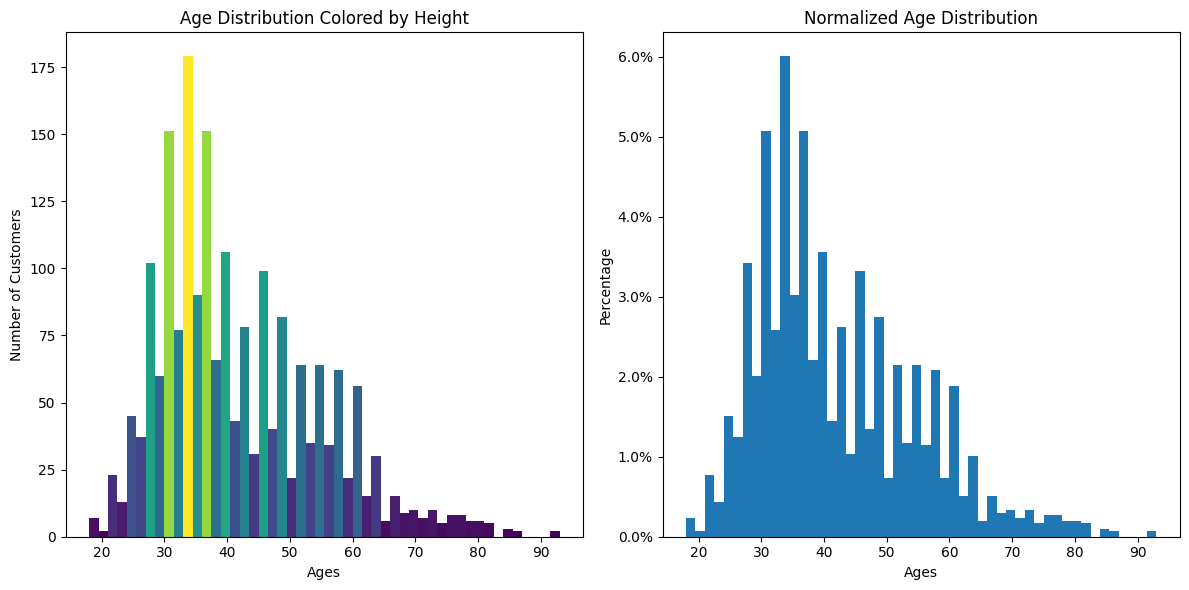

In [ ]:
# Histogram of customer ages

n_bins = 50  # Number of bins

fig, axs = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)

# Histogram on the left: colored by height
N, bins, patches = axs[0].hist(df['age'], bins=n_bins)
fracs = N / N.max()  # Normalize the data to 0..1 for coloring
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Histogram on the right: normalized to display density (percentage)
axs[1].hist(df['age'], bins = n_bins, density = True)
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

# Setting labels and titles for clarity and incorporating elements from Code 2
axs[0].set_title('Age Distribution Colored by Height')
axs[0].set_xlabel('Ages')
axs[0].set_ylabel('Number of Customers')

axs[1].set_title('Normalized Age Distribution')
axs[1].set_xlabel('Ages')
axs[1].set_ylabel('Percentage')

plt.show()

* **Age Distribution Colored by Height:** This histogram shows the frequency of customers across different ages, with bars colored according to their height. The tallest bar, which represents the most common age range, is around the 30-year mark. The color gradient from dark purple to bright yellow suggests an increase in frequency, with yellow indicating the highest frequency. The distribution is right-skewed, indicating a larger young customer base and fewer older customers.

* **Normalized Age Distribution:** The second histogram is a normalized version of the age distribution, presented in percentages. The most common age range, around 30 years old, makes up approximately 5% of the total population. This normalization allows for the comparison of proportions rather than absolute numbers, which is particularly useful when comparing groups of different sizes.

Both histograms indicate a younger to middle-age demographic as the primary customer base, with a rapid decrease in frequency as age increases.

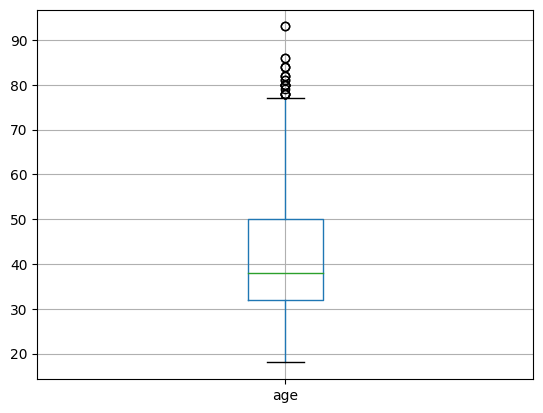

In [ ]:
# Boxplot of customer ages
df.boxplot(column = 'age')
plt.show()

* **Central Tendency:** The median age is indicated by the green line within the box, appearing to be around the late 30s.
* **Interquartile Range (IQR):** The box represents the middle 50% of the data, showing that the bulk of the ages fall roughly between the low 30s and 50.
* **Spread:** The vertical lines, or "whiskers", extend to the minimum and maximum age values within 1.5 IQR from the lower and upper quartiles respectively. The range of these whiskers suggests that the age distribution spans from the late teens to about the late 70s, giving a broad distribution of ages.
* **Outliers:** The individual points above the upper whisker represent outliers, indicating ages that fall beyond the expected range based on the IQR. These are likely individuals in their late-70s and above.

This box plot indicates a predominantly middle-aged demographic, with a relatively symmetrical age distribution but with a few older individuals significantly deviating from the rest of the population.

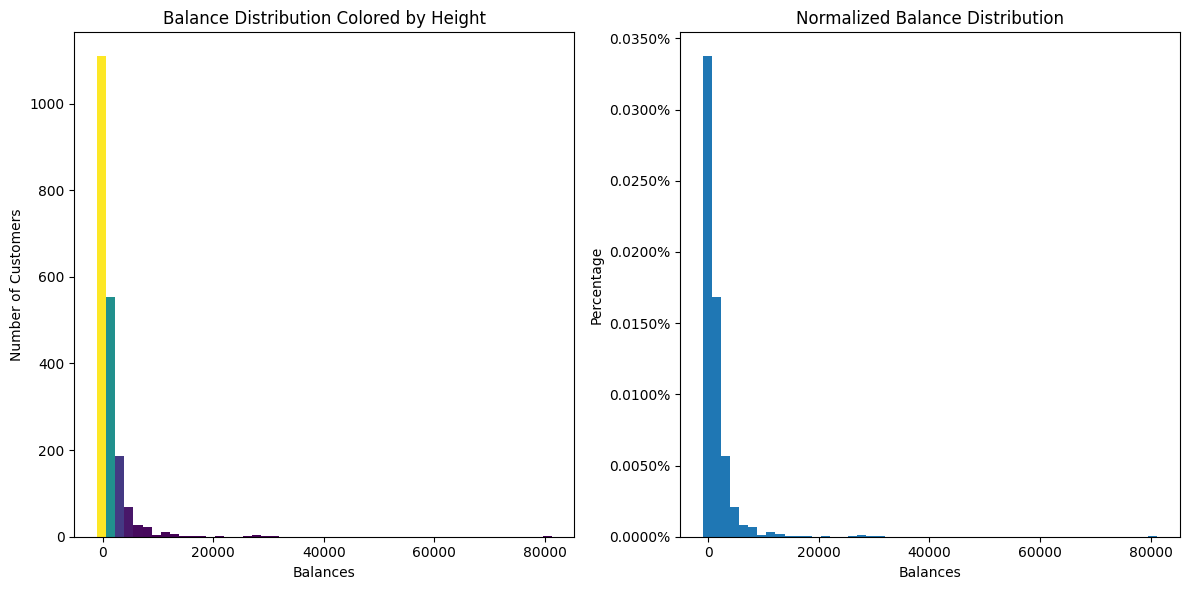

In [ ]:
# Histogram of customer balances

n_bins = 50  # Number of bins

fig, axs = plt.subplots(1, 2, figsize = (12, 6), tight_layout = True)

# Histogram on the left: colored by height
N, bins, patches = axs[0].hist(df['balance'], bins = n_bins)
fracs = N / N.max()  # Normalize the data to 0..1 for coloring
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Histogram on the right: normalized to display density (percentage)
axs[1].hist(df['balance'], bins = n_bins, density = True)
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

# Setting labels and titles for clarity and incorporating elements from Code 2
axs[0].set_title('Balance Distribution Colored by Height')
axs[0].set_xlabel('Balances')
axs[0].set_ylabel('Number of Customers')

axs[1].set_title('Normalized Balance Distribution')
axs[1].set_xlabel('Balances')
axs[1].set_ylabel('Percentage')

plt.show()

* **Balance Distribution Colored by Height:** The histogram on the left displays the number of customers for different balance ranges, with bars colored to represent height. The majority of customers have a balance close to 0, as indicated by the tall yellow bar. The frequency of customers rapidly decreases as the balance amount increases, as shown by the decreasing height of the bars moving right.

* **Normalized Balance Distribution:** The histogram on the right shows the balance distribution as a percentage of the total number of customers. Similar to the first histogram, it confirms that a large proportion of customers have lower balances, with the highest percentage concentrated at the near-zero balance range.

Both histograms are extremely right-skewed, indicating that while most customers have low balances, there are a few customers with significantly higher balances. The highest balance ranges are rare enough to not be clearly visible on the normalized histogram. This pattern of skewness suggests that a financial product or service related to these customers might be more commonly utilized by those with lower available balances. The data may be useful for financial institutions to tailor their services or products to meet the needs of the majority of their customer base, which seems to be lower-balance holders.

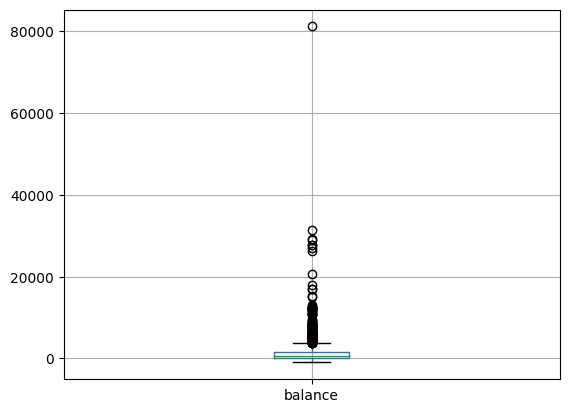

In [ ]:
# Boxplot of customer balances
df.boxplot(column = 'balance')
plt.show()

* **Median Balance:** The median balance is relatively low, close to the bottom of the box, indicating that the median value is closer to the lower quartile than the upper quartile.
* **Interquartile Range:** The box, which represents the middle 50% of the data, is very narrow, suggesting that the majority of customers have balances within a small range near the lower end of the scale.
* **Outliers:** A significant number of outliers are present above the upper whisker, indicating that there are customers with much higher balances compared to the median customer.
* **Skewness:** The distribution of balances is heavily right-skewed, with most customers holding low balances and a few with very high balances.
* **Whiskers:** The lower whisker is very short or non-existent, which suggests that there are very few low outliers, and the lower balances are tightly grouped. The upper whisker is quite long, indicating a wide spread in the upper range of the balances.

In summary, the box plot reveals that while the majority of customers have low balances, there is a small segment with substantially higher balances, which could represent a target group for specific financial services or products. The data indicates a pronounced inequality in the distribution of balances among customers.

# Distribution Analysis for Categorical Atributes


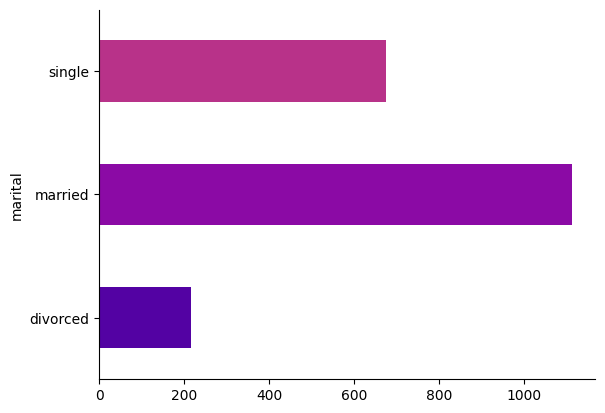

In [ ]:
# Barchart for marital status
df.groupby('marital').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('plasma')) # Dark2
plt.gca().spines[['top', 'right',]].set_visible(False)

* **Married:** This category has the highest count, with just over 1,000 individuals. It indicates that the majority of the population in the dataset are married.
* **Single:** The second most populous category is single individuals, with the count approaching 700.
* **Divorced:** This status has the fewest individuals, with a count of around 200.

From the chart, it's clear that the dataset consists predominantly of married individuals, followed by singles, and a smaller fraction of divorced individuals.

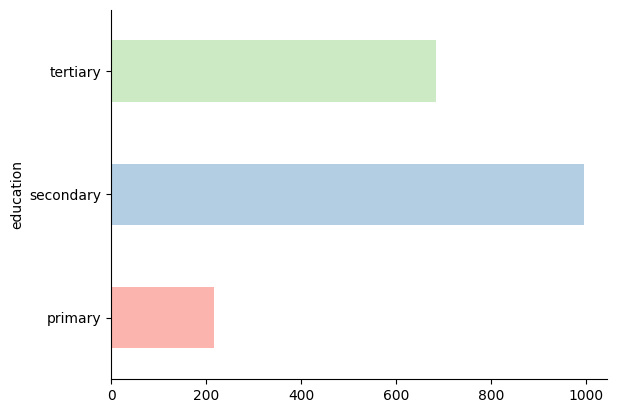

In [ ]:
# Barchart for education levels completed
df.groupby('education').size().plot(kind = 'barh', color = sns.palettes.mpl_palette('Pastel1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

* **Secondary Education:** This is the most common level of education among the individuals represented, with the count nearing 1,000.
* **Tertiary Education:** The second most frequent education level is tertiary, with the count close to 700.
* **Primary Education:** The least represented education level is primary, with a count around 200.

The chart indicates that the dataset includes a majority of individuals with at least secondary education, followed by a significant number with tertiary (higher education) degrees, and relatively few with only primary education. This suggests a relatively educated population, perhaps reflecting a dataset skewed towards a demographic with access to secondary and higher education. This information could be useful for understanding the educational background of a customer base, for workforce planning, or for educational program development.

# Combined Distribution of Attributes

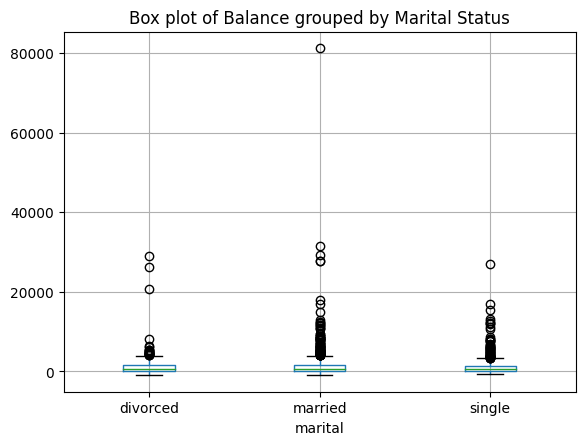

In [ ]:
# Boxplot of balance, grouped by the categorical attribute marital status
df.boxplot(column = 'balance', by = 'marital')
plt.title('Box plot of Balance grouped by Marital Status')
plt.suptitle("")
plt.show()

* **Median Balances:** All three categories have similar median balances, as indicated by the line within each box. These medians are close to the bottom of the boxes, suggesting that the typical balance is low across all marital statuses.

* **Interquartile Ranges (IQR):** The IQRs, which represent the middle 50% of the data within the boxes, are relatively narrow for all categories, indicating that most individuals, regardless of marital status, have balances within a limited range.

* **Spread and Outliers:** Each category has a number of outliers, with single and divorced statuses showing fewer extreme values compared to the married status. The married status has outliers with higher balances, some reaching above 80,000, which are substantially higher than for single and divorced individuals.

**Comparison Across Marital Status:**
* The 'married' status has the widest range of balances, including the highest outliers, possibly reflecting combined or joint accounts.
* The 'single' and 'divorced' statuses show similar distributions in balance, with fewer high outliers, which may indicate individual account holdings.

In summary, while the typical balances are low and similar across different marital statuses, married individuals exhibit a wider range and higher extreme values in their balances. This could suggest combined financial resources or a different financial behavior compared to single or divorced individuals.

<ipython-input-753-b3e2ffaaf722>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'marital', y = 'balance', palette = 'plasma')


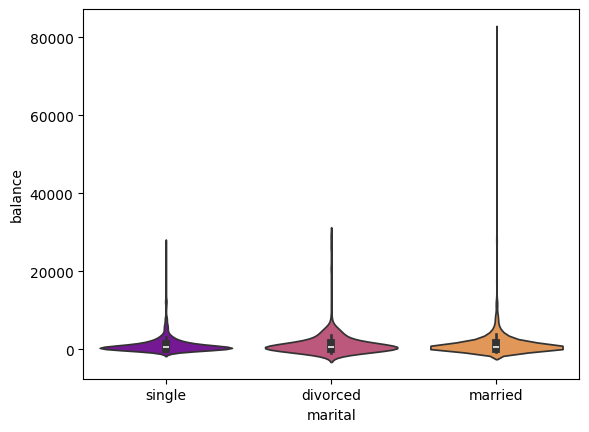

In [ ]:
# Violinplot of balance, grouped by marital status
sns.violinplot(data = df, x = 'marital', y = 'balance', palette = 'plasma')
plt.show()

* **Shape of Distributions:** The violin plot for each marital status shows a similar pattern: a wide base near zero balance which quickly narrows, indicating that a majority of individuals in each category have low balances. The shapes are tall and thin, suggesting a peak in frequency at lower balances.

* **Median Balances:** The white dot within each violin represents the median balance, and these appear to be relatively low for all categories. The medians are near the bottom of each distribution, suggesting that at least half of the individuals have balances close to zero.

* **Spread of Balances:** The 'married' category shows a broader spread in balances, with a long tail extending towards higher values. This suggests that married individuals have a wider range of balances and includes some with very high balances.

* **Outliers and Extremes:** The plots for 'single' and 'divorced' also display tails indicating the presence of higher balance outliers, but these tails are not as pronounced as in the 'married' category.

In summary, the violin plot indicates that the bulk of individuals, regardless of marital status, maintain low balances, with the median balance being low across all categories. However, the married group displays a greater variability in balances, with a number of individuals having significantly high balances compared to the single and divorced groups. This could reflect combined incomes or savings in married households.

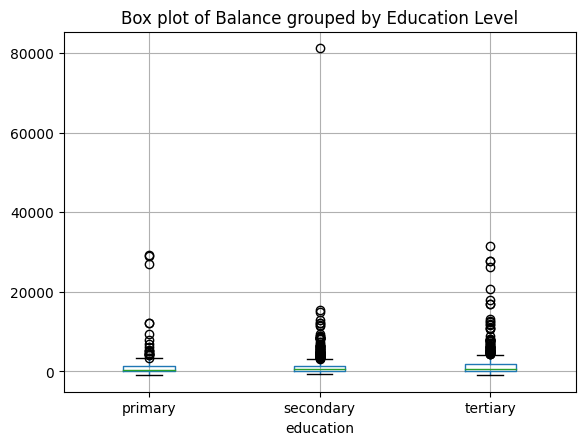

In [ ]:
# Boxplot of balance, grouped by the categorical attribute marital status
df.boxplot(column = 'balance', by = 'education')
plt.title('Box plot of Balance grouped by Education Level')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

* **Median Balances:** The medians, indicated by the lines within the boxes, are relatively low for all education levels, suggesting that the typical balance doesn't differ much with education level.

* **Interquartile Ranges:** The boxes, representing the middle 50% of the data, are comparable across all education levels, indicating a similar range of balance values from the 25th to the 75th percentile.

* **Spread of Balances:** The spread of balances, as indicated by the "whiskers" or the vertical lines extending from the boxes, is also quite similar across the different education levels, although the tertiary level shows a slightly wider range, reaching higher maximum values.

* **Outliers:** There are a notable number of outliers in each category, particularly in the tertiary education level, which has outliers with the highest balance values. This suggests that while the majority of individuals across all education levels have a similar range of balances, those with tertiary education have a subset of individuals with significantly higher balances.

In summary, the box plot suggests that educational attainment does not greatly affect the median balance or the general distribution of balances. However, there is a trend towards higher balance outliers among individuals with tertiary education, which may reflect the impact of higher education on earning potential and wealth accumulation.

<ipython-input-755-666398fda0ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x = 'education', y = 'balance', palette = 'pastel')


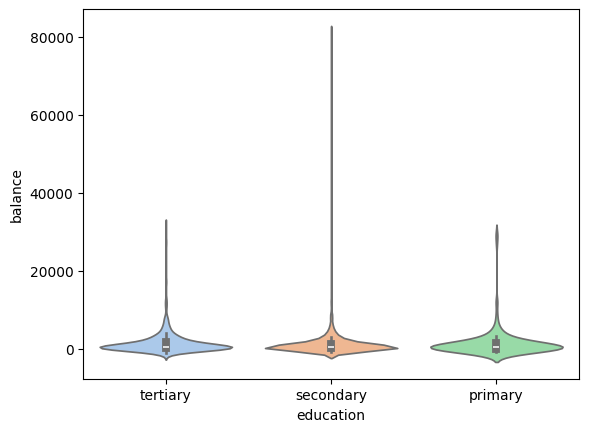

In [ ]:
# Violinplot of balance, grouped by marital status
sns.violinplot(data = df, x = 'education', y = 'balance', palette = 'pastel')
plt.show()

* **Shape of Distribution:** The width of each violin plot indicates the frequency of balances, with the widest part representing the most common balance range for each education level. All three distributions are skewed towards the lower end, showing that lower balances are more common across all education levels.

* **Median Balances:** The white boxes inside the violins represent the interquartile ranges, and the lines within those boxes mark the median balances. The medians are low across all education levels, suggesting that the typical balance is closer to the lower end of the balance range.

* **Spread of Balances:** Tertiary education shows a larger spread of balances, extending higher than secondary and primary. This suggests that individuals with tertiary education have a wider range of balances and are more likely to have higher balances.

* **Outliers:** All education levels have outliers, but tertiary education has outliers reaching the highest balance values, indicating that individuals with higher education levels might have greater earning potential or wealth accumulation.

In summary, the violin plot indicates that while most individuals across education levels tend to have lower balances, those with tertiary education have a greater variability and potential for higher balances. This could reflect the impact of higher educational attainment on financial status.

## Comparing Balance, Education, & Marital Status Together

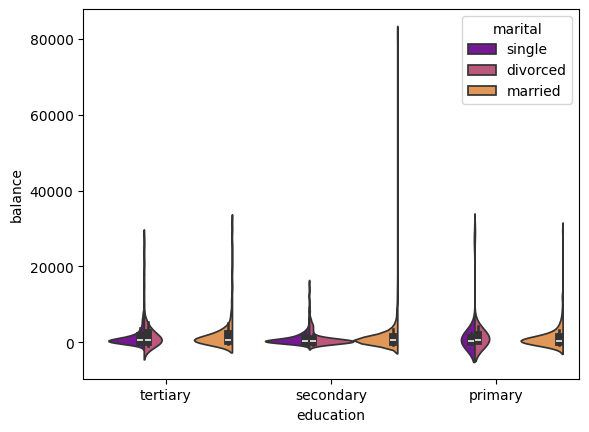

In [ ]:
sns.violinplot(data = df, x = 'education', y = 'balance', hue = 'marital', split = True, palette = 'plasma')
plt.show()



* **Distribution Shape:** The plots are skewed towards the lower end of the balance range for all education levels, indicating most individuals have lower balances. The thickness of the violins at the lower end suggests a high frequency of lower balances.

* **Median Balances:** The median of each distribution is indicated by the white dots, which are positioned low within each violin. This suggests that the median balance is relatively low across all groups.

**Education Level Comparison:**
* **Tertiary Education:** Shows a broader distribution with a longer tail extending to higher balances, especially for married individuals, which suggests a higher potential for wealth accumulation among this group.
* **Secondary Education:** Has a somewhat narrower distribution but still shows a propensity for higher balances in the married category.
* **Primary Education:** Shows the least variation in balances with a more pronounced peak at the lower end of the balance spectrum.

**Marital Status Comparison:**
* **Married:** Individuals consistently show a wider spread in balances across all education levels, with the highest balances seen in the tertiary educated group.
* **Single and Divorced:** Tend to have similar distributions within each education level, with fewer high balance outliers compared to married individuals.

In summary, the data suggests that marital status and education level together may influence balance distributions, with married individuals often having a wider range and higher balances, particularly among those with tertiary education. This might reflect combined financial resources in married households or the impact of education on earning potential.

<Axes: xlabel='education', ylabel='balance'>

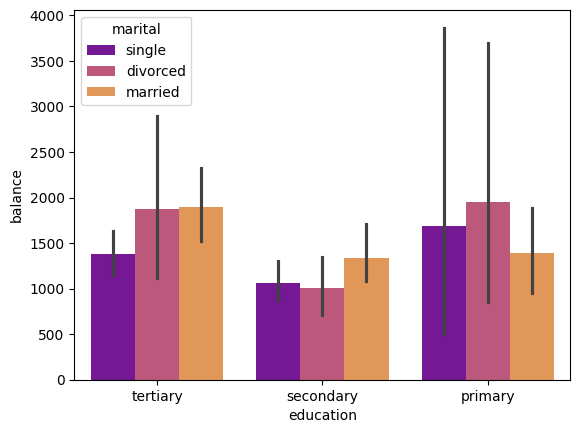

In [ ]:
sns.barplot(hue = 'marital', x = 'education', y = 'balance', data = df, palette = 'plasma')

* **Education Level Influence:** Individuals with tertiary education have the highest mean balances, followed by those with secondary, and then primary education, suggesting that higher education may correlate with higher average balances.

* **Marital Status Influence:** Within each education level, married individuals tend to have higher mean balances compared to single and divorced individuals, possibly reflecting combined incomes or financial pooling in marriages.

The error bars, representing variability or standard deviation, indicate a significant spread in the balance within each subgroup, suggesting that there are individuals with balances much higher or lower than the mean.

* **Tertiary Education:** This group shows the highest mean balances across all marital statuses, with married individuals possibly having slightly higher means than single or divorced, although the error bars overlap significantly.

* **Secondary Education:** Mean balances are lower than in the tertiary group, but the pattern across marital statuses is similar, with married individuals showing slightly higher mean balances.

* **Primary Education:** Mean balances are the lowest, but the trend of married individuals having higher mean balances continues. The error bars are relatively large compared to the mean, suggesting greater variability in balances.

Overall, the chart suggests that both education level and marital status may influence average balance, with higher education correlating with higher balances and married individuals showing slightly higher average balances within each education category. The large error bars across all groups highlight that there is substantial variation in balance within each category.

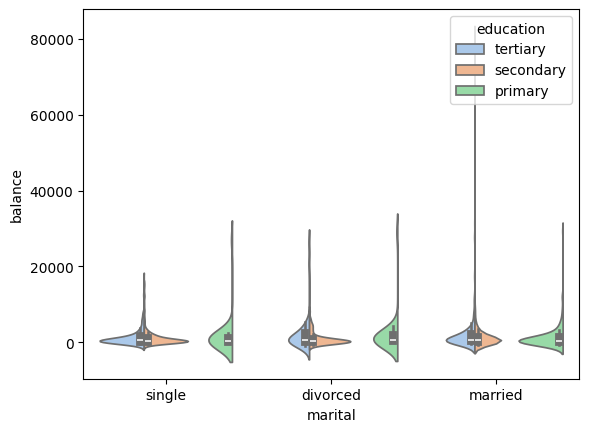

In [ ]:
sns.violinplot(data = df, x = 'marital', y = 'balance', hue = 'education', split = True, palette = 'pastel')
plt.show()

**Balance Distribution:** For all marital statuses, the balance distributions are right-skewed, with most individuals having lower balances and a thin tail extending towards higher balances.

**Marital Status and Education Impact:**
* Single: Individuals with tertiary education have a slightly wider distribution, indicating more variability in their balances compared to secondary and primary.
* Divorced: Similar to singles, those with tertiary education exhibit a broader distribution, whereas secondary and primary are narrower.
* Married: There is a significant spread in the balances for those with tertiary education, suggesting that married individuals with higher education levels may have greater financial resources. The distributions for secondary and primary education are narrower but still show some higher balance outliers.

**Median Balances:** The medians, indicated by the white dots, are relatively low across all groups, suggesting that the typical balance does not differ greatly by marital status or education level.

**Comparison Across Groups:** Married individuals with tertiary education show the most substantial variability and potential for higher balances. In contrast, single and divorced individuals have similar balance profiles regardless of their education level.

In summary, the data suggests that marital status combined with education level can influence balance distributions, with married individuals showing a potential for higher balances, especially with tertiary education. The consistent right-skew across all groups indicates that a small number of individuals hold much larger balances than the majority.

<Axes: xlabel='marital', ylabel='balance'>

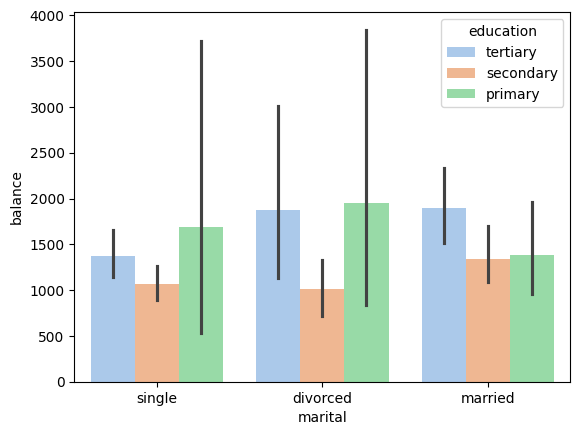

In [ ]:
sns.barplot(hue = 'education', x = 'marital', y = 'balance', data = df, palette = 'pastel')

* Average Balances: Across all marital statuses, individuals with tertiary education tend to have higher average balances than those with secondary or primary education, suggesting that higher education may be associated with higher financial balances.

* Variability: The error bars, which likely represent the standard deviation or confidence interval, indicate significant variability in the balance within each subgroup. The ranges suggest that while the averages are indicative of the central tendency, there is considerable dispersion around these averages.

**Marital Status Comparison:**
* Single and Divorced: The average balances are relatively similar across education levels, though tertiary educated singles and divorced individuals appear to have slightly higher averages.
* Married: This group shows a notable difference in average balances based on education, with tertiary educated married individuals having higher average balances than their secondary and primary educated counterparts.

**Education Influence:** Tertiary education seems to contribute to higher average balances, which may reflect the impact of higher educational qualifications on earning potential.

In summary, the chart suggests that education positively correlates with average balance across marital statuses, with tertiary education associated with the highest balances. The variability within each category, as indicated by the error bars, is substantial, indicating a wide range of balances for individuals within each subgroup.

# Conclusion & Findings

**Question: Does an individual's balance and education affect their martial status?**

**Conclusion:**
The data does not provide definitive evidence that an individual's balance and education directly affect their marital status. While there are observable differences in balance distributions among individuals with different marital statuses and education levels, these variations do not conclusively indicate causality between higher balances, education, and marital status.

**Findings:**

* **Balance Distribution Across Marital Status:**
 * Married individuals tend to have a wider range of balances, with some of the highest balances observed across all groups. This could suggest that being married is associated with combined financial resources or stability, contributing to higher total balances in some cases.
 * Single and divorced individuals generally show similar balance profiles, with fewer high-balance outliers than married individuals.

* **Influence of Education on Balance:**
 * Individuals with tertiary education consistently show higher average balances across all marital statuses, suggesting that higher educational attainment may be linked to greater earning potential and financial accumulation.
 * Secondary and primary education levels do not show as pronounced a difference in balance as tertiary education does.

* **Variability and Outliers:**
 * There is considerable variability within each marital status and education level group, as indicated by substantial error bars and the presence of outliers in the distributions. This implies that while certain trends are observable, individual circumstances vary widely.
 * The presence of outliers, especially among married individuals with tertiary education, indicates that while education may contribute to higher balances, other factors likely influence financial outcomes.

* **Correlation vs. Causation:**
 * The observed patterns do not establish causation but rather show correlations between education level, balance, and marital status. It is possible that other variables not analyzed here, such as age, occupation, or regional economic conditions, may also play significant roles.

**Overall Implications:**
The data suggests that while there may be a correlation between higher educational attainment and higher individual balances, which in turn appear more frequently among married individuals, this does not necessarily imply that education and balance are determinative factors in an individual's marital status. Marital status may be influenced by a complex interplay of various socio-economic factors, including but not limited to personal finances and education. Further analysis with more data would be required.